# Question 2

2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [43]:
# impoort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

In [44]:
# import dataset
salary=pd.read_csv("C:/Users/Shubham Tiwari/Downloads/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [45]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


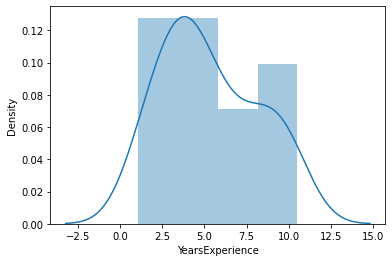

In [47]:
sns.distplot(salary['YearsExperience']);

C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


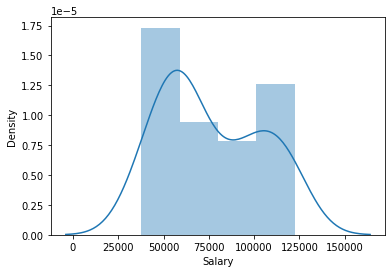

In [48]:
sns.distplot(salary['Salary']);

# Correlation Analysis

In [49]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


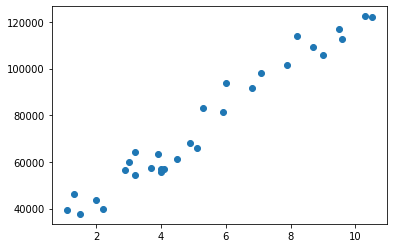

In [50]:
plt.scatter('YearsExperience','Salary',data=salary);

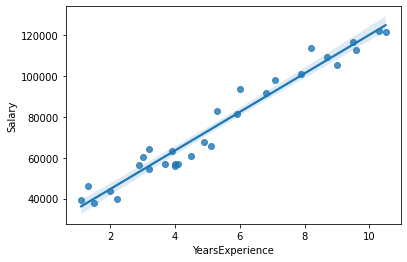

In [51]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary']);

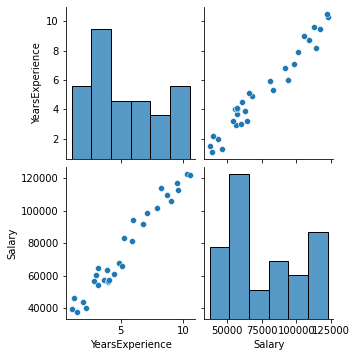

In [52]:
sns.pairplot(salary);

# Model Building

In [53]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()
model

# Model Testing

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        18:28:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [56]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [57]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [58]:
np.sqrt(model.rsquared)

0.9782416184887599

# Model Testing (Log)

In [59]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=salary).fit()
model2

In [60]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        18:28:56   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model2.params, model2.params,model2.pvalues

(Intercept                  14927.97177
 np.log(YearsExperience)    40581.98796
 dtype: float64,
 Intercept                  14927.97177
 np.log(YearsExperience)    40581.98796
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [62]:
model2.rsquared, model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

# Model Testing (Square)

In [63]:
model3 = smf.ols("Salary~np.square(YearsExperience)",data = salary).fit()
model3

In [64]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.52e-16
Time:                        18:29:00   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model3.params, model3.tvalues,  model3.pvalues

(Intercept                     48042.585515
 np.square(YearsExperience)      776.318773
 dtype: float64,
 Intercept                     21.973654
 np.square(YearsExperience)    17.397015
 dtype: float64,
 Intercept                     3.389190e-19
 np.square(YearsExperience)    1.518127e-16
 dtype: float64)

In [66]:
model3.rsquared, model3.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

# Model Testing (Square root)

In [67]:
model4 = smf.ols("Salary~np.sqrt(YearsExperience)",data = salary).fit()
model4

In [68]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           8.57e-18
Time:                        18:29:04   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model4.params, model4.tvalues, model4.pvalues

(Intercept                  -16055.769117
 np.sqrt(YearsExperience)    41500.680583
 dtype: float64,
 Intercept                   -3.262308
 np.sqrt(YearsExperience)    19.437148
 dtype: float64,
 Intercept                   2.906965e-03
 np.sqrt(YearsExperience)    8.565358e-18
 dtype: float64)

In [70]:
model4.rsquared, model4.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

# Model Prediction

In [71]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [72]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [73]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [74]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [75]:
model2.predict(data_pred)

0    59511.842441
1    80242.161754
dtype: float64

In [76]:
model3.predict(data_pred)

0    55029.454474
1    67450.554847
dtype: float64

In [77]:
model4.predict(data_pred)

0    55825.518202
1    76742.573779
dtype: float64

In [78]:
pred = model.predict(salary)
pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [79]:
pred2 = model2.predict(salary)
pred2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [80]:
pred3 = model3.predict(salary)
pred3.head()

0    48981.931230
1    49354.564241
2    49789.302755
3    51147.860608
4    51799.968377
dtype: float64

In [81]:
pred4 = model4.predict(salary)
pred4.head()

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

In [82]:
data1=pd.concat([salary,pred,pred2,pred3,pred4],axis=1)
data1

,YearsExperience,Salary,0,1,2,3
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,27470.511884
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,31262.287009
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,34771.976586
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,42635.056211
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,45499.687794
5,2.9,56642.0,53197.090931,58136.050079,54571.426398,54617.343293
6,3.0,60150.0,54142.087163,59511.842441,55029.454474,55825.518202
7,3.2,54445.0,56032.079627,62130.943929,55992.089753,58182.905200
8,3.2,64445.0,56032.079627,62130.943929,55992.089753,58182.905200
9,3.7,57189.0,60757.060788,68022.718504,58670.389521,63772.383867


In [83]:
salary_pred = data1.rename({0:'model',1:'log',2:'square',3:'square root'},axis=1)
salary_pred

,YearsExperience,Salary,model,log,square,square root
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,27470.511884
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,31262.287009
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,34771.976586
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,42635.056211
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,45499.687794
5,2.9,56642.0,53197.090931,58136.050079,54571.426398,54617.343293
6,3.0,60150.0,54142.087163,59511.842441,55029.454474,55825.518202
7,3.2,54445.0,56032.079627,62130.943929,55992.089753,58182.905200
8,3.2,64445.0,56032.079627,62130.943929,55992.089753,58182.905200
9,3.7,57189.0,60757.060788,68022.718504,58670.389521,63772.383867
